<a href="https://colab.research.google.com/github/ChinarVyas/Evaluation-Projects/blob/main/Phase%3AII/Global_Power_Plant_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database
The database includes the following indicators:
•
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
•	`country_long` (text): longer form of the country designation
•	`name` (text): name or title of the power plant, generally in Romanized form
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
•	`capacity_mw` (number): electrical generating capacity in megawatts
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`primary_fuel` (text): energy source used in primary electricity generation or export
•	`other_fuel1` (text): energy source used in electricity generation or export
•	`other_fuel2` (text): energy source used in electricity generation or export
•	`other_fuel3` (text): energy source used in electricity generation or export
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
•	`url` (text): web document corresponding to the `source` field
•	`geolocation_source` (text): attribution for geolocation information
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
•	`year_of_capacity_data` (number): year the capacity information was reported
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
•	`generation_data_source` (text): attribution for the reported generation information
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories.
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw

Dataset Link-
•	https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [2]:
gpp=pd.read_csv(r'/content/drive/MyDrive/Data Analysis/Data/database_IND.csv')

In [3]:
pd.set_option('display.max_columns',100,'display.max_rows',600)

In [4]:
gpp

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# working on cleaning the data to be able to interpret the details

as the entire details revolve around the power plants across"India" you do not need the "country","country_long" as it is constant throughout the data and dropping url too as that is not important during our analysis

In [5]:
 gpp.drop(['country','country_long','url',"wepp_id","generation_gwh_2013","generation_gwh_2019","estimated_generation_gwh","geolocation_source","other_fuel3","other_fuel2","year_of_capacity_data","generation_data_source","gppd_idnr"],axis=1,inplace=True)

Here we obeserve there are multiple null values which we will have to attend through work on getting the (mode) of the data.

In [6]:
 gpp


,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,NaN,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,NaN,NaN,NaN,NaN,NaN


In [7]:
gpp.isnull().sum()


name                     0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
owner                  565
source                   0
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

# columns:"wepp_id","generation_gwh_2013","generation_gwh_2019"."estimated_generation_gwh" are empty and have no values throughout hence removed post review of null values also other fuel 3,2, &"geolocation_source"does not have much supporting values

In [8]:
 for i in gpp.columns:
    print(gpp[i].value_counts())
    print('\n')

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64


5.000       39
10.000      22
600.000     20
15.000      20
1200.000    19
20.000      18
1.000       18
30.000      16
50.000      15
100.000     14
60.000      13
500.000     12
300.000     11
24.000      11
25.000      11
120.000     10
16.000       9
36.000       9
1000.000     9
3.000        8
12.000       8
40.000       8
6.000        8
9.000        8
10.500       7
1320.000     7
250.000      7
50.400       7
90.000       7
75.000       7
240.000      7
16.500       6
2.000        6
21.000       6
150.000      6
4.000        6
270.000      5
35.000       5
18.000       5
45.000       5
22.500       5
22.000       5
750.000    

In [9]:
gpp.replace(" ", "")

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,NaN,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,NaN,NaN,NaN,NaN,NaN


In [10]:
gpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 907 non-null    object 
 1   capacity_mw          907 non-null    float64
 2   latitude             861 non-null    float64
 3   longitude            861 non-null    float64
 4   primary_fuel         907 non-null    object 
 5   other_fuel1          198 non-null    object 
 6   commissioning_year   527 non-null    float64
 7   owner                342 non-null    object 
 8   source               907 non-null    object 
 9   generation_gwh_2014  398 non-null    float64
 10  generation_gwh_2015  422 non-null    float64
 11  generation_gwh_2016  434 non-null    float64
 12  generation_gwh_2017  440 non-null    float64
 13  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), object(5)
memory usage: 99.3+ KB


In [11]:
gpp1=gpp.drop_duplicates()
gpp1

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,NaN,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,NaN,NaN,NaN,NaN,NaN


initially we had 907 entries and 27 columns, we dropped all the unneccassary columns to work with 14 columns. we see some null values that we will work upon as we move further. we have removed the whitespaces & duplicates till this point  

In [12]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (14, 4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


<ipython-input-13-39fc58ee3b79>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="primary_fuel",data=gpp1,palette="Pastel2")


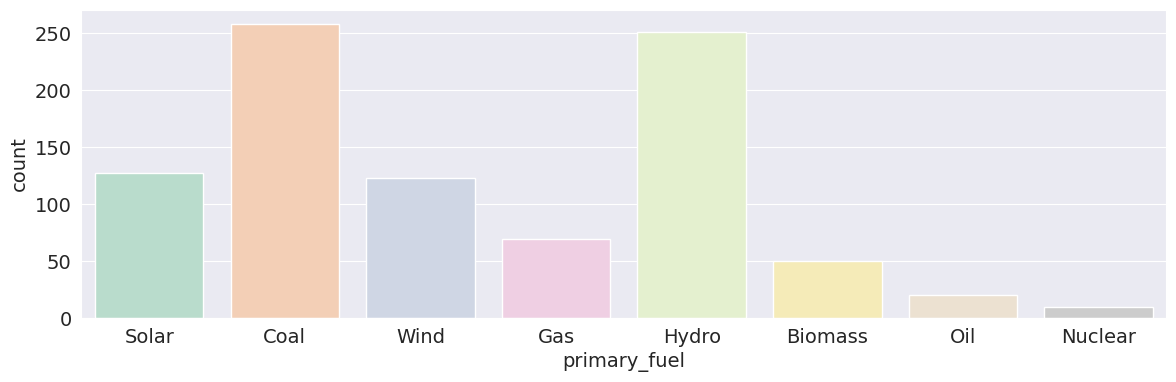

In [13]:
print(gpp1["primary_fuel"].value_counts())
sns.countplot(x="primary_fuel",data=gpp1,palette="Pastel2")
plt.show()

In [14]:
main_primary_fuel = gpp1.primary_fuel.value_counts() * 100 / gpp1.primary_fuel.count()
main_primary_fuel

Coal       28.445424
Hydro      27.673649
Solar      14.002205
Wind       13.561191
Gas         7.607497
Biomass     5.512679
Oil         2.205072
Nuclear     0.992282
Name: primary_fuel, dtype: float64

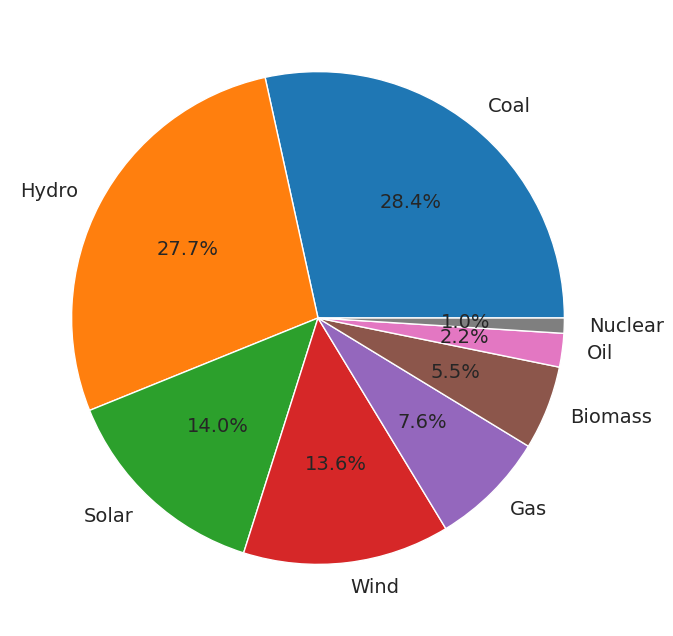

In [15]:
fig = plt.figure(figsize=(10, 8))
plt.pie(main_primary_fuel, labels=main_primary_fuel.index,autopct='%1.1f%%');


We see a hugh dependency on non renewable source:- Coal, but also see a good sign as a shift to renewable cumulatively being nearing 58%

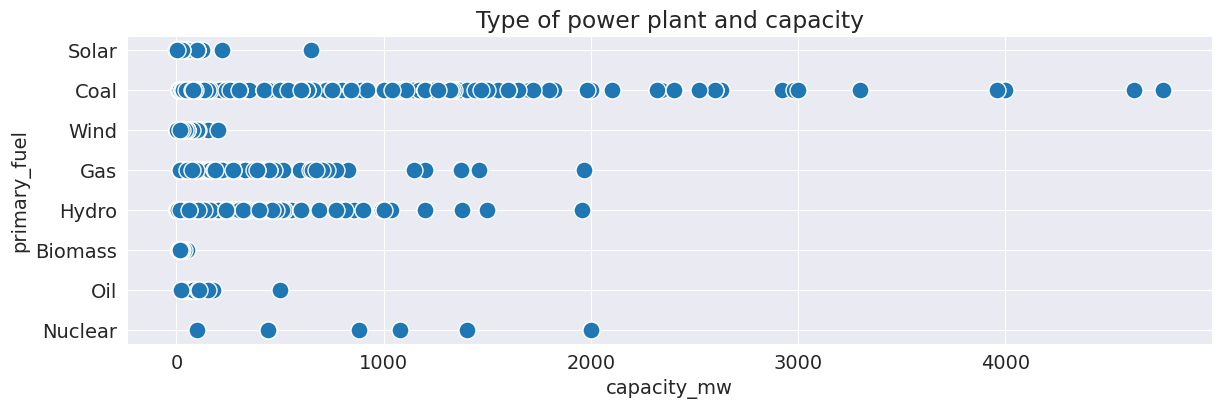

In [16]:
sns.scatterplot(x = gpp1.capacity_mw, y = gpp1.primary_fuel, s = 150)
plt.title('Type of power plant and capacity');

Here it is evident that the major dependency is on Coal compared to other fuels

we now will work on transformation and filling the nan values in the data

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
gpp1['primary_fuel'] = encoder.fit_transform(gpp1['primary_fuel'])
gpp1['source'].fillna(gpp1['source'].mode()[0], inplace=True)
gpp1['owner'].fillna(gpp1['owner'].mode()[0], inplace=True)

In [18]:
gpp1.fillna(gpp1.median()[0], inplace=True)

<ipython-input-18-3bab1375c3a2>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  gpp1.fillna(gpp1.median()[0], inplace=True)


In [19]:
 gpp1.isnull().sum()

name                   0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
owner                  0
source                 0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [20]:
company_capacity = gpp1.groupby(['name', 'primary_fuel'])[['capacity_mw']].sum().sort_values('capacity_mw', ascending=False).head(20)
company_capacity

,,capacity_mw
name,primary_fuel,
VINDH_CHAL STPS,1,4760.0
MUNDRA TPP,1,4620.0
MUNDRA UMPP,1,4000.0
SASAN UMPP,1,3960.0
TIRORA TPP,1,3300.0
RIHAND,1,3000.0
TALCHER STPS,1,3000.0
SIPAT STPS,1,2980.0
CHANDRAPUR_Coal,1,2920.0


Here we see  high dependency on coal for energy generation.grouped top 20 companies with the higher MW production

will scale the data and remove the skewness and outliers now

In [21]:
gpp1.drop(["name","owner","source","other_fuel1"],axis=1,inplace=True)

In [22]:
gpp1

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,59.200000,59.200000,59.200000,59.200000,59.200000
1,98.0,24.7663,74.6090,1,59.2,59.200000,59.200000,59.200000,59.200000,59.200000
2,39.2,21.9038,69.3732,7,59.2,59.200000,59.200000,59.200000,59.200000,59.200000
3,135.0,23.8712,91.3602,2,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,59.200000,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,59.2,59.200000,59.200000,59.200000,59.200000,59.200000
904,25.5,15.2758,75.5811,7,59.2,59.200000,59.200000,59.200000,59.200000,59.200000
905,80.0,24.3500,73.7477,1,59.2,59.200000,59.200000,59.200000,59.200000,59.200000


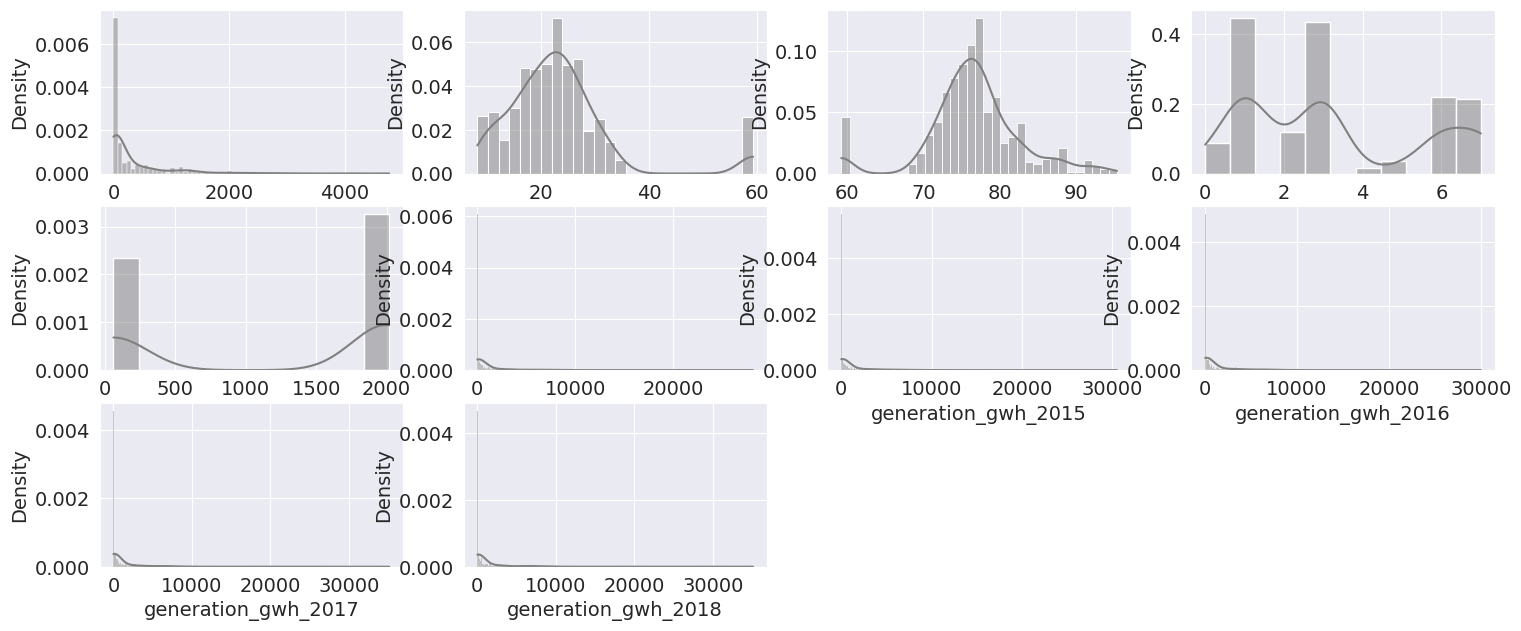

In [23]:
plt.figure(figsize=(18,20))
for i in enumerate(gpp1):
    plt.subplot(8,4,i[0]+1)
    sns.histplot(gpp1[i[1]],color='grey',kde=True,stat= 'density');

In [24]:
from scipy.stats import zscore

In [25]:
z = np.abs(zscore(gpp1[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','capacity_mw']]))
threshold = 3
df = gpp1[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ",gpp1.shape)
print ("Shape of the dataframe after removing outliers: ", df.shape)
print ("Percentage of data loss post outlier removal: ", (gpp1.shape[0]-df.shape[0])/gpp1.shape[0]*100)

Shape of the dataframe before removing outliers:  (907, 10)
Shape of the dataframe after removing outliers:  (882, 10)
Percentage of data loss post outlier removal:  2.7563395810363835


In [26]:
df.skew()

capacity_mw            2.054665
latitude               1.914796
longitude             -0.275375
primary_fuel           0.428186
commissioning_year    -0.279248
generation_gwh_2014    2.885639
generation_gwh_2015    2.711018
generation_gwh_2016    2.651120
generation_gwh_2017    2.563221
generation_gwh_2018    2.615528
dtype: float64

In [27]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,59.200000,59.200000,59.200000,59.200000,59.200000
1,98.0,24.7663,74.6090,1,59.2,59.200000,59.200000,59.200000,59.200000,59.200000
2,39.2,21.9038,69.3732,7,59.2,59.200000,59.200000,59.200000,59.200000,59.200000
3,135.0,23.8712,91.3602,2,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,59.200000,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,59.2,59.200000,59.200000,59.200000,59.200000,59.200000
904,25.5,15.2758,75.5811,7,59.2,59.200000,59.200000,59.200000,59.200000,59.200000
905,80.0,24.3500,73.7477,1,59.2,59.200000,59.200000,59.200000,59.200000,59.200000


Will work on training the model and sizing the data to fit X,Y also scaling it for the ease of processing

In [28]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [31]:
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size=0.30, random_state=42)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(617, 9)
(265, 9)
(617,)
(265,)


In [33]:
model_regression = {
    "Linear Regression" : LinearRegression(),
        "Decision Tree" : DecisionTreeRegressor(),
        "Random Forest" : RandomForestRegressor(),
    "Gradient Boosting" :GradientBoostingRegressor(),
    "Ada Boost" :AdaBoostRegressor(),
    "Extra Trees" :ExtraTreesRegressor()
}

In [34]:
for i,model in model_regression.items():
    model.fit(x_train,y_train)
    print(f'{i} trained')

Linear Regression trained
Decision Tree trained
Random Forest trained
Gradient Boosting trained
Ada Boost trained
Extra Trees trained


In [35]:
for i, model in model_regression.items():
    print(f'{i} R^2 Score: {format(model.score(x_test, y_test), ".3f")}')

Linear Regression R^2 Score: 0.718
Decision Tree R^2 Score: 0.593
Random Forest R^2 Score: 0.741
Gradient Boosting R^2 Score: 0.761
Ada Boost R^2 Score: 0.627
Extra Trees R^2 Score: 0.767


In [36]:
for i, model in model_regression.items():
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{i} MAE: {format(mae, ".3f")}')

Linear Regression MAE: 131.694
Decision Tree MAE: 148.459
Random Forest MAE: 111.537
Gradient Boosting MAE: 106.651
Ada Boost MAE: 243.032
Extra Trees MAE: 109.152


# *As per R^2 and MAE Gradient Boosting is giving very good output*

In [37]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_test_gb=gb.predict(x_test)
print("r2_score is = ",r2_score(y_test,pred_test_gb)*100)
print('mean_absolute_error = ',mean_absolute_error(y_test,pred_test_gb))
print('mean_squared_error = ',mean_squared_error(y_test,pred_test_gb))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(y_test,pred_test_gb)))

r2_score is =  76.14410100141538
mean_absolute_error =  106.50440570845346
mean_squared_error =  55713.9558529847
root_mean_squared_error =  236.03803899580402


In [38]:
pred_gb=r2_score(y_test,pred_test_gb)
for i in range(2,100,15):
    score=cross_val_score(gb,x,y,cv=i)
    lsc=score.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_gb*100)
    print('\n')

At cv = 2
Cross validation score is = 75.1720081506099
Accuracy score is = 76.14410100141538


At cv = 17
Cross validation score is = 75.1887572201827
Accuracy score is = 76.14410100141538


At cv = 32
Cross validation score is = 74.58688917052827
Accuracy score is = 76.14410100141538


At cv = 47
Cross validation score is = 31.052794596056486
Accuracy score is = 76.14410100141538


At cv = 62
Cross validation score is = -161.14633575541833
Accuracy score is = 76.14410100141538


At cv = 77
Cross validation score is = 29.55264228105104
Accuracy score is = 76.14410100141538


At cv = 92
Cross validation score is = -11.832121975820236
Accuracy score is = 76.14410100141538




Text(0.5, 1.0, 'Extra Trees Regression')

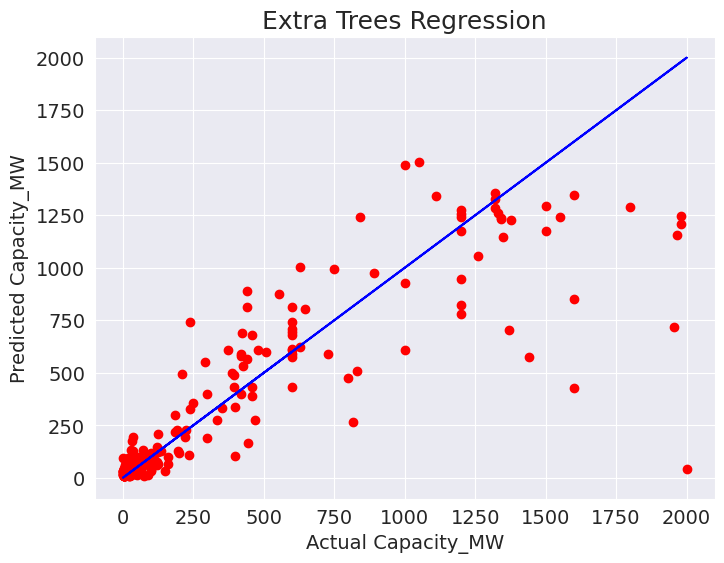

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_gb,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Capacity_MW',fontsize=14)
plt.ylabel('Predicted Capacity_MW',fontsize=14)
plt.title('Extra Trees Regression',fontsize=18)

In [40]:
import joblib
joblib.dump(gb,'Gb_Capacity')

['Gb_Capacity']

In [41]:
#!pip install pycaret

In [42]:
import pycaret
from pycaret.classification import *
s=setup(gpp1, target = 'primary_fuel')

,Description,Value
0,Session id,6800
1,Target,primary_fuel
2,Target type,Multiclass
3,Original data shape,"(907, 10)"
4,Transformed data shape,"(907, 10)"
5,Transformed train set shape,"(634, 10)"
6,Transformed test set shape,"(273, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [43]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7903,0.5708,0.7903,0.7837,0.7767,0.7339,0.7377,0.2820
lightgbm,Light Gradient Boosting Machine,0.7886,0.5720,0.7886,0.7798,0.7755,0.7320,0.7354,3.0340
rf,Random Forest Classifier,0.7824,0.5700,0.7824,0.7745,0.7635,0.7224,0.7271,0.5110
et,Extra Trees Classifier,0.7809,0.5678,0.7809,0.7684,0.7581,0.7197,0.7249,0.3380
gbc,Gradient Boosting Classifier,0.7602,0.5604,0.7602,0.7558,0.7483,0.6952,0.6987,2.3770
dt,Decision Tree Classifier,0.7096,0.4961,0.7096,0.7121,0.7033,0.6339,0.6370,0.0830
knn,K Neighbors Classifier,0.6578,0.5223,0.6578,0.6286,0.6290,0.5595,0.5660,0.1290
lr,Logistic Regression,0.5710,0.5113,0.5710,0.5239,0.5325,0.4539,0.4627,1.2030
lda,Linear Discriminant Analysis,0.5696,0.4956,0.5696,0.5340,0.5139,0.4525,0.4709,0.0480
ridge,Ridge Classifier,0.5600,0.0000,0.5600,0.5146,0.5004,0.4350,0.4559,0.0420


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

doing cross validation

In [46]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7812,0.9469,0.7812,0.8023,0.7727,0.7309,0.7384
1,0.7344,0.9561,0.7344,0.7024,0.7072,0.6605,0.6661
2,0.7969,0.9551,0.7969,0.7800,0.7815,0.7434,0.7463
3,0.8281,0.9652,0.8281,0.8228,0.8212,0.7860,0.7874
4,0.6825,0.9230,0.6825,0.6954,0.6692,0.5937,0.6018
5,0.8254,0.9621,0.8254,0.8184,0.8145,0.7786,0.7806
6,0.8413,0.0000,0.8413,0.8525,0.8375,0.7964,0.7991
7,0.7778,0.0000,0.7778,0.7904,0.7755,0.7188,0.7208
8,0.8254,0.0000,0.8254,0.8244,0.8105,0.7754,0.7781


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

working on hyperparameter tunning

In [47]:
tune_xgboost =tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7656,0.9540,0.7656,0.8141,0.7557,0.7113,0.7188
1,0.7344,0.9513,0.7344,0.7010,0.7112,0.6600,0.6654
2,0.7969,0.9554,0.7969,0.7605,0.7756,0.7423,0.7442
3,0.7812,0.9649,0.7812,0.7896,0.7798,0.7281,0.7305
4,0.6508,0.9239,0.6508,0.6515,0.6339,0.5504,0.5560
5,0.8254,0.9585,0.8254,0.8184,0.8145,0.7786,0.7806
6,0.7778,0.0000,0.7778,0.7873,0.7764,0.7167,0.7190
7,0.7143,0.0000,0.7143,0.7258,0.7126,0.6414,0.6440
8,0.8254,0.0000,0.8254,0.8025,0.8093,0.7754,0.7771


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Ensembling

In [48]:
xgboost_boosting=ensemble_model(xgboost,method="Boosting")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0625,0.5000,0.0625,0.0039,0.0074,0.0000,0.0000
1,0.0469,0.5000,0.0469,0.0022,0.0042,0.0000,0.0000
2,0.0469,0.5000,0.0469,0.0022,0.0042,0.0000,0.0000
3,0.0469,0.5000,0.0469,0.0022,0.0042,0.0000,0.0000
4,0.0476,0.5000,0.0476,0.0023,0.0043,0.0000,0.0000
5,0.0476,0.5000,0.0476,0.0023,0.0043,0.0000,0.0000
6,0.0635,0.0000,0.0635,0.0040,0.0076,0.0000,0.0000
7,0.0635,0.0000,0.0635,0.0040,0.0076,0.0000,0.0000
8,0.0635,0.0000,0.0635,0.0040,0.0076,0.0000,0.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [51]:
evaluate_model(xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [52]:
print(best)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [53]:
xgboost_final=finalize_model(xgboost)

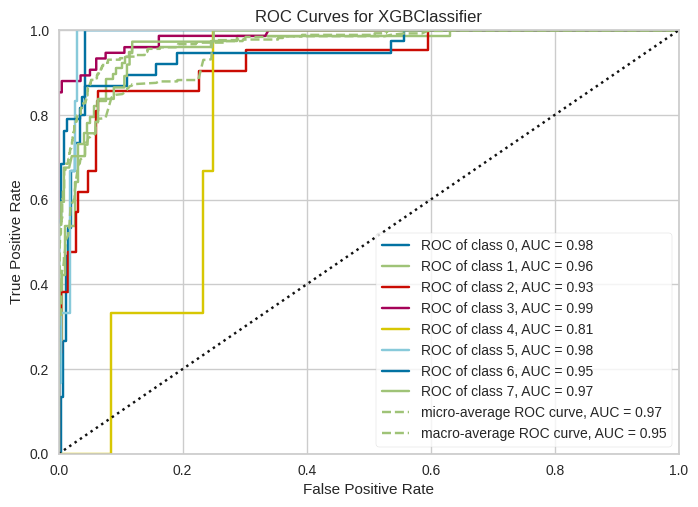

In [63]:
plot_model(xgboost)

In [64]:
save_model(xgboost_final,"Global_Primary-fuel")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['capacity_mw', 'latitude',
                                              'longitude', 'commissioning_year',
                                              'generation_gwh_2014',
                                              'generation_gwh_2015',
                                              'generation_gwh_2016',
                                              'generation_gwh_2017',
                                              'generation_gwh_2018'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               ke...
                                importance_type=None,
         

# **Project complete**